In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [124]:
def read_file(filename):
    blocks = []
    threads = []
    bandwidth = []

    with open(filename) as file:
        for line in file:
            if line[0:9] == 'Coalesced':
                bois = re.search(r'gDim=\s*(.+?), bDim=\s*(.+?), bw=\s*(.+?)GB/s', line)
                blocks.append(bois.group(1))
                threads.append(bois.group(2))
                bandwidth.append(bois.group(3))

    data = np.zeros((len(blocks), 3))
    data[:, 0] = blocks
    data[:, 1] = threads
    data[:, 2] = bandwidth

    df = pd.DataFrame(data)
    df.columns = ['blocks', 'threads', 'bandwidth']

    #df['blocks'] = df['blocks'].astype(int)
    return df

<AxesSubplot:title={'center':'Bandwidth for 1 Block'}, xlabel='threads', ylabel='Bandwidth GB/s'>

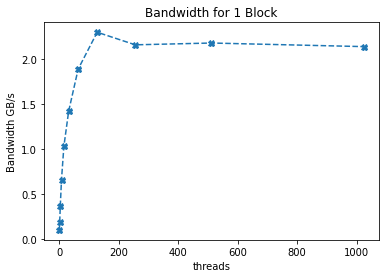

In [158]:
# find best thread number
df = read_file('3_2_results_threads.txt')
df.plot(x='threads', y='bandwidth', legend=False, ylabel='Bandwidth GB/s', linestyle='--', marker='X', title='Bandwidth for 1 Block')

<AxesSubplot:title={'center':'Bandwidth for 128 Threads/Block'}, xlabel='blocks', ylabel='Bandwidth GB/s'>

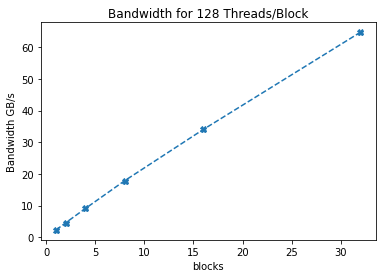

In [159]:
# find best block number relative to best thread number
df = read_file('3_2_results_blocks.txt')
df.plot(x='blocks', y='bandwidth', legend=False, ylabel='Bandwidth GB/s', linestyle='--', marker='X', title='Bandwidth for 128 Threads/Block')

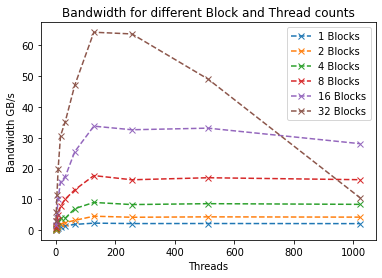

In [160]:
# find best block number relative to best thread number
df = read_file('3_2_results_coarse.txt')

for blocks in [1, 2, 4, 8, 16, 32]:
    data_for_block = df[df['blocks'] == blocks]
    plt.plot(data_for_block['threads'], data_for_block['bandwidth'], marker='x', linestyle='--', label=f'{blocks} Blocks')

plt.xlabel('Threads')
plt.ylabel('Bandwidth GB/s')
plt.title('Bandwidth for different Block and Thread counts')
plt.legend()

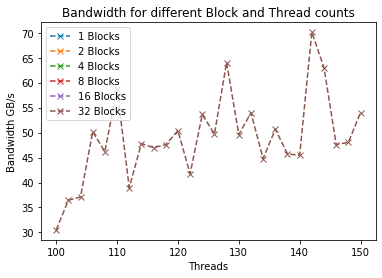

In [162]:
# find best block number relative to best thread number
df = read_file('3_2_results_fine.txt')

for blocks in [1, 2, 4, 8, 16, 32]:
    data_for_block = df[df['blocks'] == blocks]
    plt.plot(data_for_block['threads'], data_for_block['bandwidth'], marker='x', linestyle='--', label=f'{blocks} Blocks')

plt.xlabel('Threads')
plt.ylabel('Bandwidth GB/s')
plt.title('Bandwidth for different Block and Thread counts')
plt.legend()